In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
df=pd.read_csv(r"C:\Users\Shriram\Downloads\SOC LAB3\3\tae.data",header=None)
df

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


<Axes: >

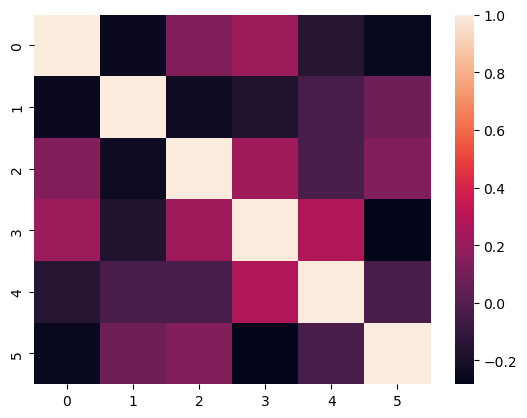

In [28]:
# dataset correlation heatmap
sns.heatmap(df.corr())

In [29]:
# unique values
for i in df:
    print(i," has these unique values:",df[i].unique())

0  has these unique values: [1 2]
1  has these unique values: [23 15  5  7  9 10 22 13 18  6 25  2  1  8 14 21 11 16  4 17 20 12 24  3
 19]
2  has these unique values: [ 3  2 11  5 22  1 21 17 25  7  9 15 13  8 16 19 14  6 12 18 23 26 24 20
  4 10]
3  has these unique values: [1 2]
4  has these unique values: [19 17 49 33 55 20 27 58  9 30 29 39 42 43 10 46 23 31 22 37 13 24 38 28
 51 36 21 48 25 11 45 18 14 35 15 32 34 66 12  3  7 54 16 44  5 26]
5  has these unique values: [3 2 1]


In [30]:
# missing values
print(df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [31]:
df.dtypes

0    int64
1    int64
2    int64
3    int64
4    int64
5    int64
dtype: object

In [32]:
# distinct elements
df.nunique()

0     2
1    25
2    26
3     2
4    46
5     3
dtype: int64

In [33]:
# missing values
missing_values = df.isnull().sum()
print(missing_values)

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64


In [34]:
# Filling missing values
df.fillna(df.median(), inplace=True)
df

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


# WITHOUT PCA

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 

In [45]:
df = pd.read_csv(r"C:\Users\Shriram\Downloads\SOC LAB3\3\tae.data", header=None) 

In [46]:
# Splitting into features and target(taking last column by default) from the dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [47]:
# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [48]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

In [49]:
# Train and test split for LDA
X_lda_train, X_lda_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [50]:
# Fit LDA model
lda_model = LinearDiscriminantAnalysis(n_components=2)
lda_model.fit(X_lda_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [51]:
y_pred = lda_model.predict(X_lda_test)

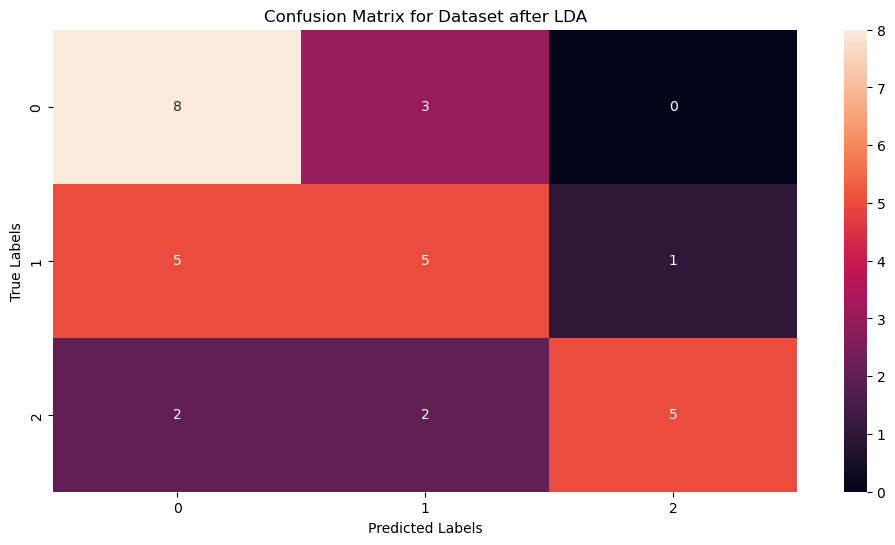

In [52]:
conf_mat = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(12, 6)) 
sns.heatmap(conf_mat, annot=True, fmt='d') 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix for Dataset after LDA') 
plt.show()

# WITH PCA 

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
# Splitting into features and target(taking last column by default) from the dataset
df1= df.iloc[:, :-1]
target=df.iloc[:,-1]

In [56]:
scaling=StandardScaler()
 
# Use fit and transform method 
scaled_data=scaling.fit_transform(df1)

# Set the n_components=3
principal=PCA(n_components=3)
x=principal.fit_transform(scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(151, 3)


In [57]:
data1=pd.DataFrame(x,columns=["PC1","PC2","PC3"])
data1

,PC1,PC2,PC3
0,3.328377,-0.422559,1.141898
1,1.562371,-1.723504,-0.301905
2,1.595033,2.578928,0.366021
3,0.442739,1.232929,0.531351
4,-1.399867,1.498221,-0.184515
...,...,...,...
146,-0.821503,-0.261219,-0.935408
147,-0.229604,-1.012990,-0.799141
148,0.950502,2.356060,0.855132
149,0.461068,1.698392,-1.387592


In [58]:
# eigen values
principal.components_

array([[-0.46345514,  0.51689142, -0.4792229 , -0.52389298, -0.11795826],
       [-0.40021062,  0.13585347, -0.10574242,  0.40366202,  0.80451899],
       [-0.60341198, -0.06359193,  0.76262553, -0.20736939, -0.08514862]])

Text(0.5, 1.0, 'PCA Scatter plot')

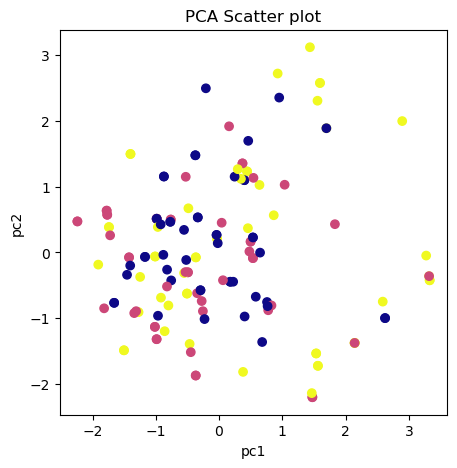

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1],c=target,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA Scatter plot')

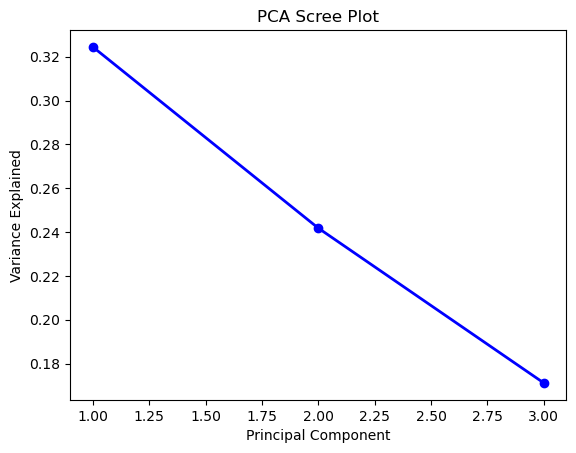

In [60]:
# Scree plot
PC_values = np.arange(principal.n_components_) + 1
plt.plot(PC_values, principal.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

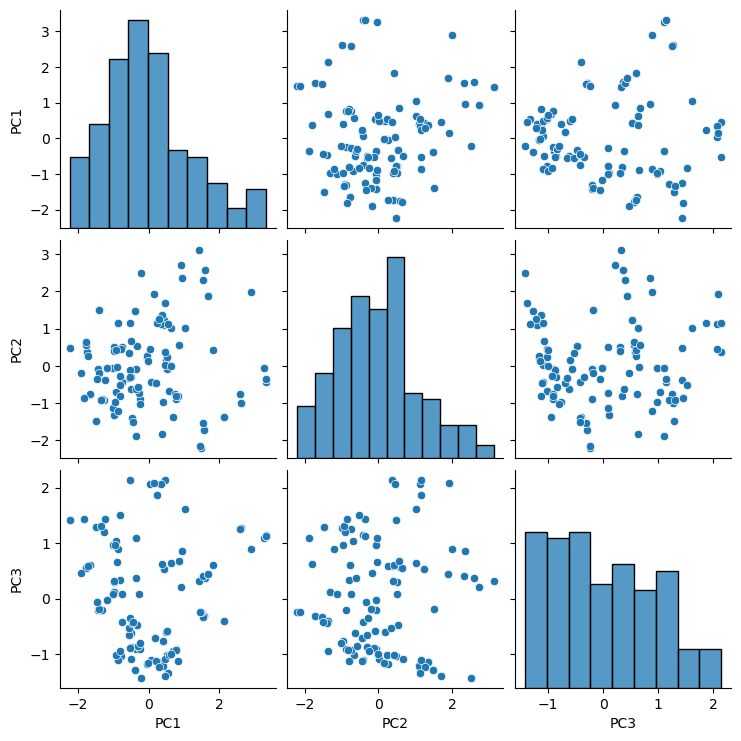

In [61]:
# pair plot between principal components
sns.pairplot(data1)
plt.show()

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [63]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [64]:
# Standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [65]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

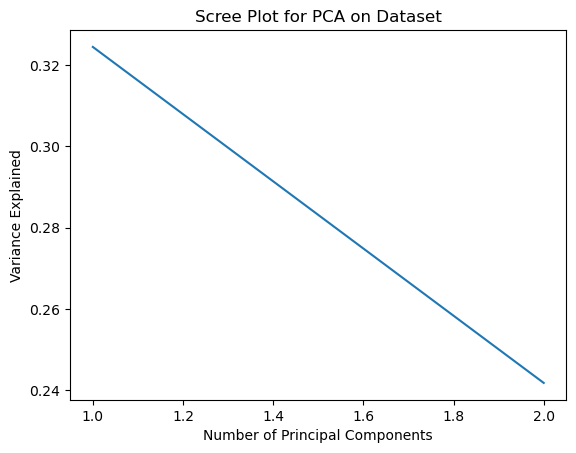

In [66]:
# Plot scree plot
plt.plot(range(1, X_pca.shape[1] + 1), pca.explained_variance_ratio_)
plt.title('Scree Plot for PCA on Dataset')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()

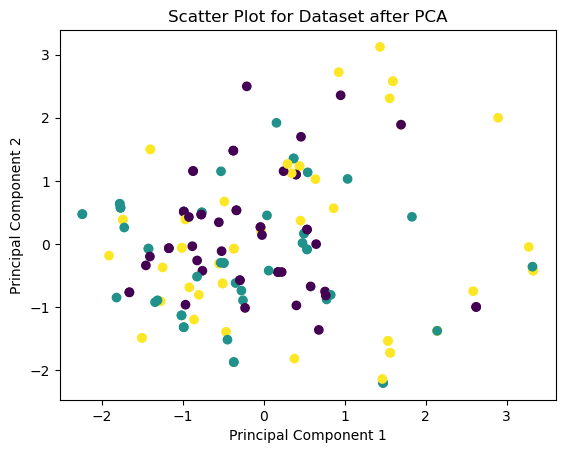

In [67]:
# Plot scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('Scatter Plot for Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [68]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X_pca, y).transform(X_pca)

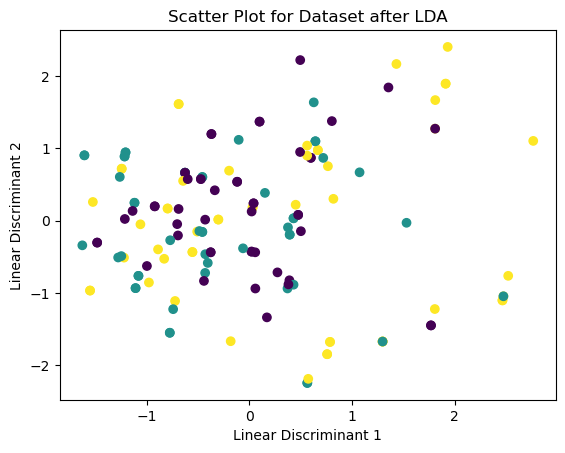

In [69]:
# Plot scatter plot
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title('Scatter Plot for Dataset after LDA')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

In [70]:
# Train and test split for LDA
X_lda_train, X_lda_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [71]:
# Fit LDA model
lda_model = LinearDiscriminantAnalysis(n_components=2)
lda_model.fit(X_lda_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [72]:
# Predict labels
y_pred = lda_model.predict(X_lda_test)

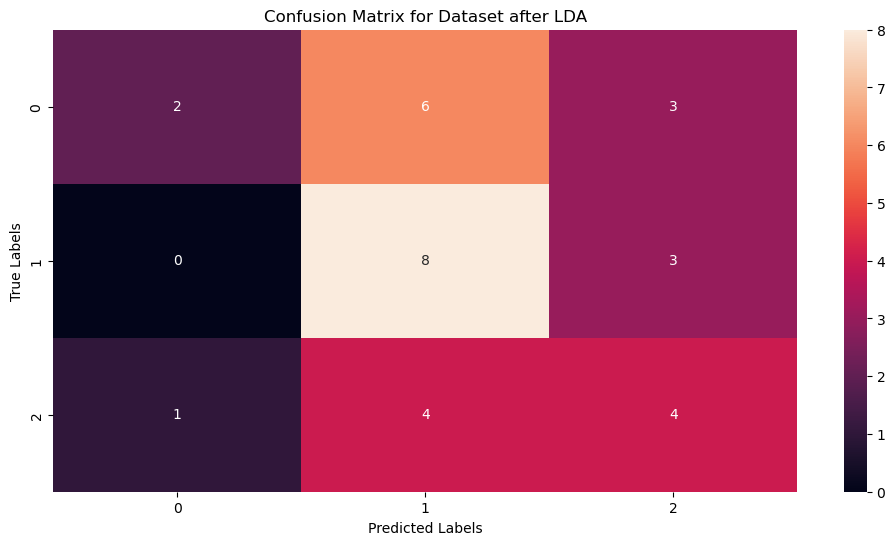

In [73]:
# Draw confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Dataset after LDA')
plt.show()